## 1. Introduction to PCA

Principal Component Analysis (PCA) is an unsupervised machine learning technique used for dimensionality reduction while preserving variance in the data.

### Applications:
- Image Compression
- Feature Selection
- Visualization of High-Dimensional Data
- Noise Reduction

## 2. How PCA Works

### Algorithm Steps:
1. Standardize the dataset.
2. Compute the covariance matrix.
3. Calculate the Eigenvalues and Eigenvectors.
4. Sort Eigenvalues in descending order and choose the top K components.
5. Project the original data onto the new principal components.

## 3. Mathematical Formulation

- Given a dataset with `n` features, PCA finds a set of `k` orthogonal axes (principal components) that capture the most variance.
- Eigenvalues (λ) determine the magnitude of variance captured by each principal component.
- Eigenvectors represent the direction of these principal components.
- The transformation formula:

  \[ Z = X W \]

  where:
  - X is the original dataset
  - W is the matrix of eigenvectors (principal components)
  - Z is the transformed lower-dimensional representation

## 4. Eigen values and Eigen vectors

AV = λV

Where:
- A is the matrix that represents the linear transformation
- lambda is the eigenvalue
- v is the eigenvector

An **eigenvector** is a non-zero vector that only changes in scale (length) when a linear transformation is applied to it. In other words, it remains in the same direction after the transformation.

An **eigenvalue** λ is a scalar that represents how much the eigenvector is stretched or shrunk when the matrix transformation is applied. It can be positive, negative, or even zero.

### Why Dimensionality Reduction is Needed?
- Suppose we have a dataset with six feature dimensions: "GDP", "Social", "Life", "Freedom", "Generosity", "Corruption".
- Visualizing six dimensions at once is impossible because humans can only perceive up to three spatial dimensions.
- PCA helps by projecting data onto a lower-dimensional space while retaining as much variance as possible.

### Concept of Projection and Unit Vector:
- Projection involves mapping high-dimensional data onto a lower-dimensional subspace while preserving relationships between points.

**Projection:** Given a data point 
𝑥, its projection onto a unit vector 𝑢 is given by:

x′ = (x⋅u)u = (transpose(X)u)u

where: 𝑥⋅𝑢 is the inner product (dot product) between 𝑥 and 𝑢
- u is a unit vector (i.e., ∣∣𝑢∣∣ = 1)

**Information Preserved by Projection**

The square of the projection magnitude represents how much of the variance in 𝑥 is captured by the projection: (T(x)u)**2

- If 𝑥 is parallel to 𝑢 then the projection captures all the information in 𝑥
- If 𝑥 is orthogonal to 𝑢, then the projection captures zero information

Thus, to maximize the captured information, we need to find the best 𝑢 that maximizes the sum of projected variances

**Finding the Best Projection Direction (Optimization Problem)**

So first we need to determine the objective function

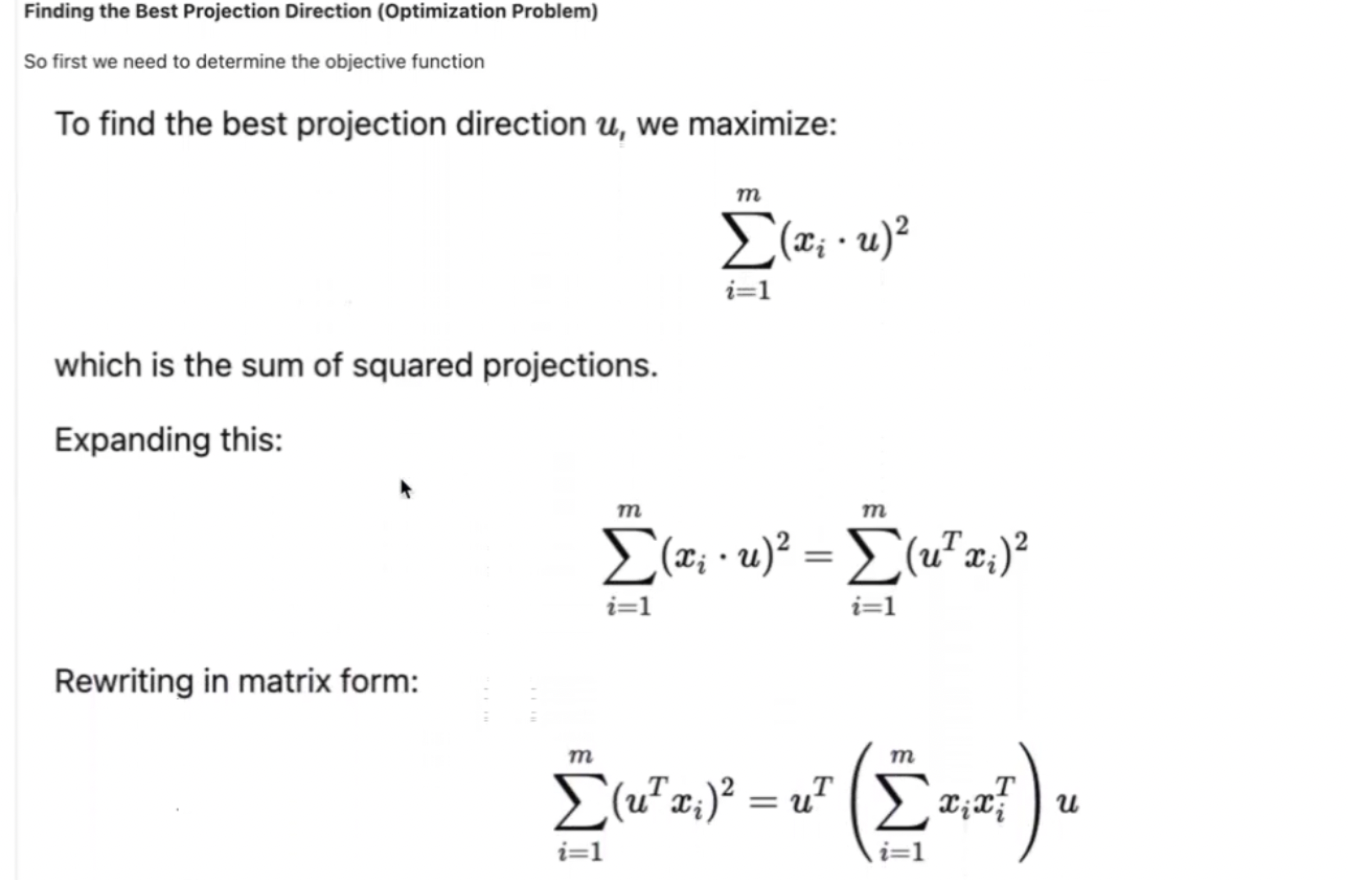

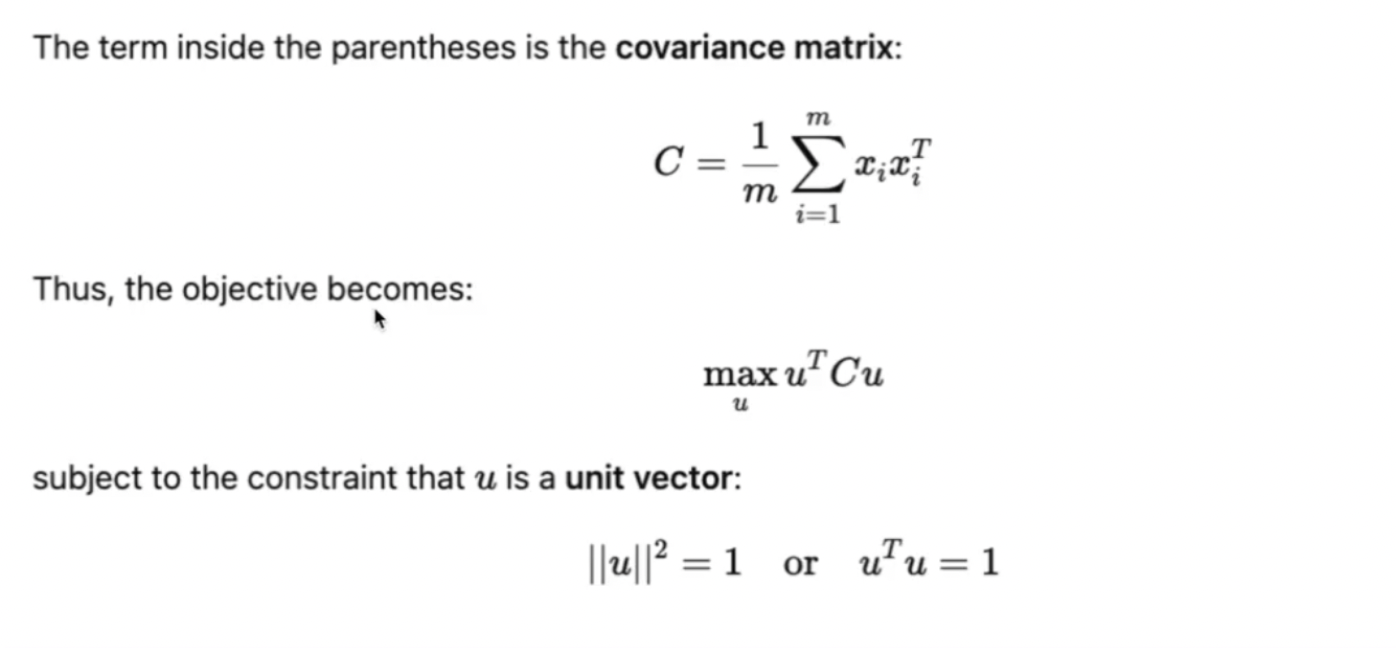

### Choosing the best principal components
- The best direction x iss the eigenvector of C corresponding is the **largest eigenvalue imax** - This eigenvector captures the maximum variance in the data.

Thus, the first principal component is: u1 = Eigenvector of C with λ max and the first principal component score is: Z1 = Xu1

Here, Z1 is the transformed data in the new 1D subspace
Remaining components: 2nd Principal component(PC2): The next best direction, perpendiculat to PC1, and so on.    

### **Differentiating the Lagrangian**

we introduce a Lagrange multiplier λ and form the Lagrange function and differentiate the equation

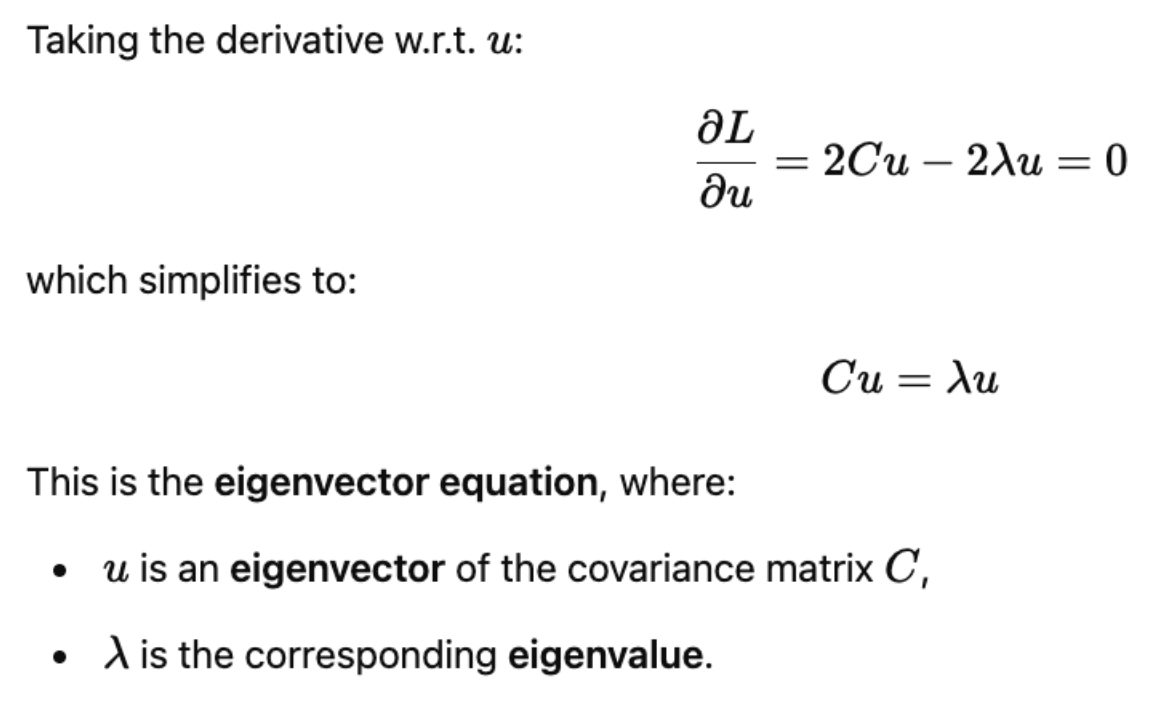

### Choosing the Best Principal Component

- The best direction 𝑢 is the eigenvector of 𝐶 corresponding to the **largest eigenvalue 𝜆max**
⁡- This eigenvector captures the maximum variance in the data.

Thus, the first principal component is: u1 = Eigenvector of C with λ max and the first principal component score is: Z1 = Xu1

Here, Z1 is the transformed data in the new 1D subspace

Remaining components: 2nd Principal Component (PC2): The next best direction, perpendicular to PC1, and so on.



# Example Use Case: Wine Dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine



In [15]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)  # also fix: 'feature_name' → 'feature_names'
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
#Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Applying PCA to reduce 2 components
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)
print("Explained variablitiy per principal component: {}".format(pca.explained_variance_ratio_))


Explained variablitiy per principal component: [0.36198848 0.1920749 ]


From the above output, you can observe that the principal component 1 holds 36.1% of the information while the principal component 2 holds only 19.2% of the information. Also, the other point to note is that while projecting 13 dimensions data to a two-dimensional data, around 45% information was lost

In [31]:
#Creating a Dataframe with principal components

pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['Target'] = data.target
pca_df

,PC1,PC2,Target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


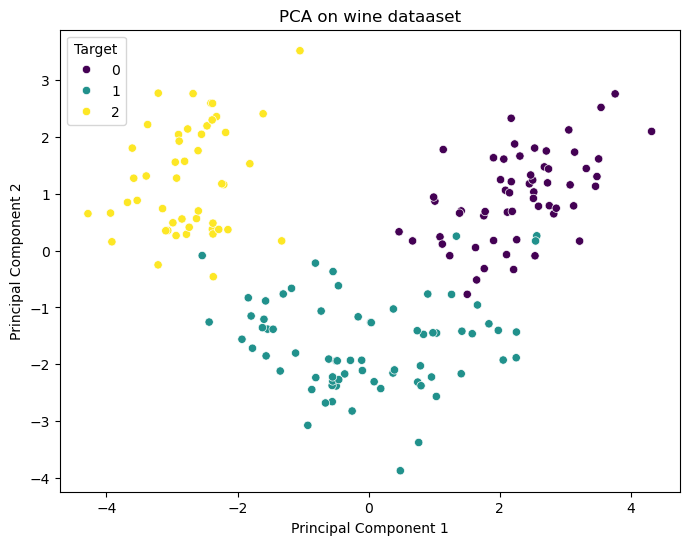

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['Target'], palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on wine dataaset")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from